In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [25]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

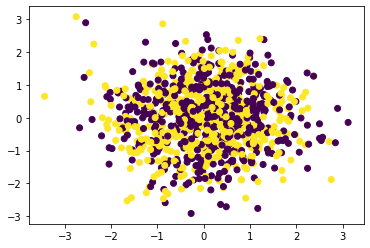

In [26]:
data_X, class_label = make_classification(n_samples=1000, 
                                          n_classes=2, weights=[1,1],
                                          random_state=1)
plt.scatter(data_X[:,1],data_X[:,2],c=class_label)

In [27]:
trainX, testX, trainy, testy = train_test_split(data_X, class_label, 
                                                test_size=0.3, random_state=1)

In [28]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model1.fit(trainX, trainy)
model2.fit(trainX, trainy)

KNeighborsClassifier()

In [29]:
probs1 = model1.predict_proba(testX)
probs2 = model2.predict_proba(testX)

In [30]:
probs1 = probs1[:, 1]
probs2 = probs2[:, 1]


In [31]:
auc1 = roc_auc_score(testy, probs1)
auc2 = roc_auc_score(testy, probs2)
print('AUC=Logistic: %.2f' % auc1)
print('AUC=KNN: %.2f' % auc2)

AUC=Logistic: 0.95
AUC=KNN: 0.91


In [32]:
fpr1, tpr1, thresholds1 = roc_curve(testy, probs1)
fpr2, tpr2, thresholds2 = roc_curve(testy, probs2)
#print(thresholds2)


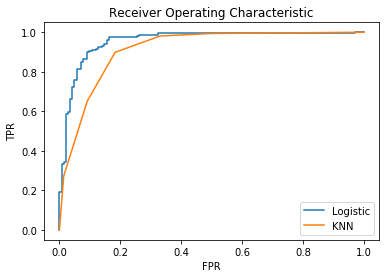

In [33]:
plt.plot(fpr1, tpr1, label= "Logistic")
plt.plot(fpr2, tpr2, label= "KNN")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()